# Programa Ingenias+ Data Science



In [ ]:
#import emoji
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.8 MB/s eta 0:00:00


Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En clases anteriores, trabajamos con el dataset `StudentPerformace`. Pudimos observar el tipo de datos que teniamos y le hiciemos algunas transformaciones.

Llego la hora de utilizar los conceptos de aprendizaje supervisado para hacer predicciones sobre alguna variable en el dataset.

Para poder ajustar modelos de Machine Learning, la herramienta más sencilla y más utilizada es `scikit-learn`. Esta librería es muy utilizada ya que contiene funciones desarrolladas para la mayoría de los modelos de machine learning. Además `Scikit-learn` tienen una amplia y muy buena [documentación](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje Supervisado 📣</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

Primero, vamos a leer los datos limpios y procesados.

In [ ]:
# Leemos nuevamente los datos de los estudiantes
students = pd.read_csv('/content/estudiantes_con_puntaje_final.csv')

In [ ]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,puntaje_final
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0,72.666667
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0,82.333333
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0,92.666667
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0,49.333333
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0,76.333333


Antes que nada, chequeemos nuevamente que eliminamos todos los valores faltantes.

In [ ]:
students.isnull().sum()

,0
race/ethnicity,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
english score,0
female,0
male,0
associate's degree,0


Ahora tenemos que decidir que variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cual va a ser la variable que al predecirla conteste la pregunta que nos hicimos de los datos.

Lo que queremos saber es:

1. ¿Qué puntaje final obtendra un estudiante?
2. Dado un estudiante, ¿aprobara o no el examen?

**_¿Qué tipo de problemas estamos tratando de resolver?_**

Para contestar estas preguntas vamos a obtener dos nuevas variables:

1. El puntaje final: Lo obtendremos promediando los tres puntajes (matematica, lectura y escritura)
2. Aprobado: Una etiqueta que me permita saber si cada estudiante del dataset aprobo el examen (puntaje final >= 60) o no lo aprobo (puntaje final < 60).

## 🟢 🟣 🟡 Clasificación

Contestaremos ahora la pregunta 2. Este problema es un problema de clasificación (_¿Por qué?_)

Lo primero que veremos es si tenemos un desbalance de clases. Es muy importante ver que no tenemos una clase minoritaria, ya que esto afectaria el algoritmo. En nuestro caso, que trabajamos con una clasificación binaria, tener un desbalance de clases implica que tenemos menos del 10% de nuestros datos que pertenecen a una de las clases.

In [ ]:
students['aprobado'] = students['puntaje_final'].apply(lambda x: 0 if x < 60 else 1)

In [ ]:
print(students.columns)

Index(['race/ethnicity', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score', 'english score', 'female', 'male',
       'associate's degree', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school', 'puntaje_final',
       'aprobado'],
      dtype='object')


In [ ]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,puntaje_final,aprobado
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0,72.666667,1
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0,82.333333,1
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0,92.666667,1
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0,49.333333,0
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0,76.333333,1


<ipython-input-11-be08769e0cdb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=students['aprobado'], palette='Set2')


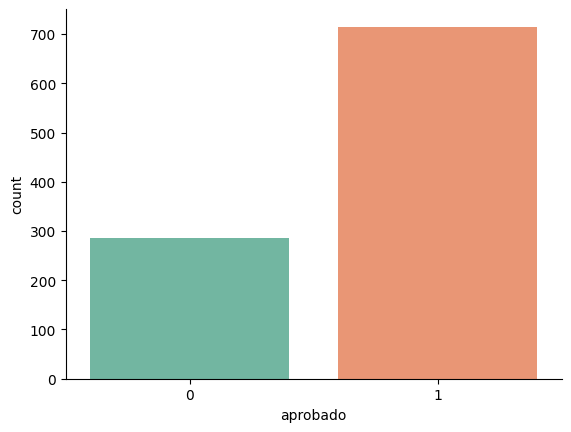

In [ ]:
sns.countplot(x=students['aprobado'], palette='Set2')
sns.despine()

In [ ]:
students['aprobado'].value_counts() / students['aprobado'].size * 100

,count
aprobado,
1,71.5
0,28.5


Si el % de desaprobados fuera menor al 10% se daria el desbalance

Como vemos que no tenemos un desbalance, podemos continuar.

#### Seleccion de target (y) y variables (X)

Ahora seleccionaremos las variables o features que deseemos usar como variable independientes y la variable a predecir.

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos `aprobado`.

In [ ]:
xc = students.drop(['math score', 'reading score', 'writing score', 'english score', 'puntaje_final', 'aprobado'],
                  axis=1)

#Se borra todo para quitarle al modelo de machine learning lo que tiene que predecir



In [ ]:
yc = students['aprobado']

In [ ]:
xc, yc = np.array(xc), np.array(yc)

#### Separando Train / Test

Separamos nuevamente el dataset en entrenamiento y testeo o evaluación.

In [ ]:
from sklearn.model_selection import train_test_split

#train_test_split hace que el 80% de los datos los use para entrenar, y 20% que lo prediga

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(xc, yc, test_size=0.2,
                                                    random_state=42)

### Clasificador kNN

### Clasificador kNN

Para realizar la clasificación utilizaremos el algoritmo de los k-vecinos más cercanos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# metricas
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Entrenamos el modelo
knn.fit(X_train_c, y_train_c);
#El 80% de variables en x train y en y train, que serian el 80% los datos del dataset cargado al principio

In [ ]:
# Predecimos
predicciones_cla = knn.predict(X_test_c)

In [ ]:
accuracy = accuracy_score(y_test_c, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

68.5%


In [ ]:
# prompt: error recall

from sklearn.metrics import recall_score
print(f'{round(recall_score(y_test_c, predicciones_cla)*100, 2)}%')


88.41%


### Random Forest

Ahora utilizaremos Random Forest, pero en su versión Clasificacion.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_cla = RandomForestClassifier()

In [ ]:
# Entrenamos el modelo
rf_cla.fit(X_train_c, y_train_c);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cla = RandomForestClassifier()

# Entrenamos el modelo
rf_cla.fit(X_train_c, y_train_c);

# Predecimos
predicciones_rf = rf_cla.predict(X_test_c)

accuracy = accuracy_score(y_test_c, predicciones_rf)*100
print(f'{round(accuracy, 2)}%')

66.5%


In [ ]:
# prompt: Sugeris alguna medida mas de error?

from sklearn.metrics import precision_score, f1_score, confusion_matrix, roc_auc_score, log_loss

# Para el modelo kNN
precision_knn = precision_score(y_test_c, predicciones_cla)*100
f1_knn = f1_score(y_test_c, predicciones_cla)*100
conf_matrix_knn = confusion_matrix(y_test_c, predicciones_cla)

print("\nMétricas para kNN:")
print(f'Accuracy: {round(accuracy_score(y_test_c, predicciones_cla)*100, 2)}%')
print(f'Recall: {round(recall_score(y_test_c, predicciones_cla)*100, 2)}%')
print(f'Precision: {round(precision_knn, 2)}%')
print(f'F1-score: {round(f1_knn, 2)}%')
print("Matriz de Confusión:\n", conf_matrix_knn)

# Para el modelo Random Forest
precision_rf = precision_score(y_test_c, predicciones_rf)*100
f1_rf = f1_score(y_test_c, predicciones_rf)*100
conf_matrix_rf = confusion_matrix(y_test_c, predicciones_rf)

print("\nMétricas para Random Forest:")
print(f'Accuracy: {round(accuracy_score(y_test_c, predicciones_rf)*100, 2)}%')
print(f'Recall: {round(recall_score(y_test_c, predicciones_rf)*100, 2)}%')
print(f'Precision: {round(precision_rf, 2)}%')
print(f'F1-score: {round(f1_rf, 2)}%')
print("Matriz de Confusión:\n", conf_matrix_rf)

# Si quieres calcular ROC AUC y Log Loss, necesitas las probabilidades predichas
# Para kNN (si el modelo lo soporta y no es una predicción hard)
# predicciones_proba_knn = knn.predict_proba(X_test_c)[:, 1]
# roc_auc_knn = roc_auc_score(y_test_c, predicciones_proba_knn)
# log_loss_knn = log_loss(y_test_c, predicciones_proba_knn)
# print(f'ROC AUC (kNN): {round(roc_auc_knn, 4)}')
# print(f'Log Loss (kNN): {round(log_loss_knn, 4)}')

# Para Random Forest (soporta predict_proba)
predicciones_proba_rf = rf_cla.predict_proba(X_test_c)[:, 1]
roc_auc_rf = roc_auc_score(y_test_c, predicciones_proba_rf)
log_loss_rf = log_loss(y_test_c, predicciones_proba_rf)
print(f'ROC AUC (Random Forest): {round(roc_auc_rf, 4)}')
print(f'Log Loss (Random Forest): {round(log_loss_rf, 4)}')



Métricas para kNN:
Accuracy: 68.5%
Recall: 88.41%
Precision: 72.19%
F1-score: 79.48%
Matriz de Confusión:
 [[ 15  47]
 [ 16 122]]

Métricas para Random Forest:
Accuracy: 66.5%
Recall: 84.06%
Precision: 72.05%
F1-score: 77.59%
Matriz de Confusión:
 [[ 17  45]
 [ 22 116]]
ROC AUC (Random Forest): 0.5543
Log Loss (Random Forest): 1.7767


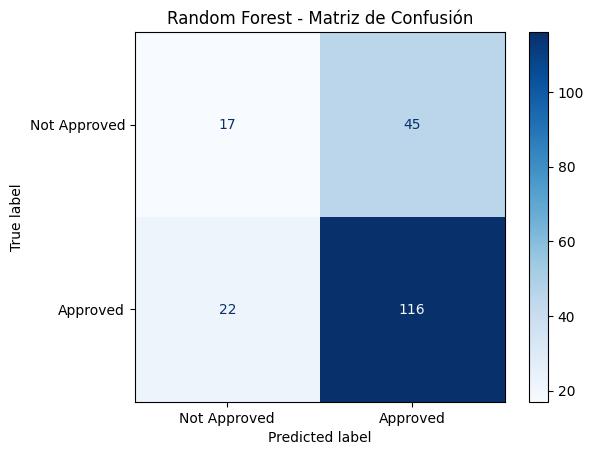

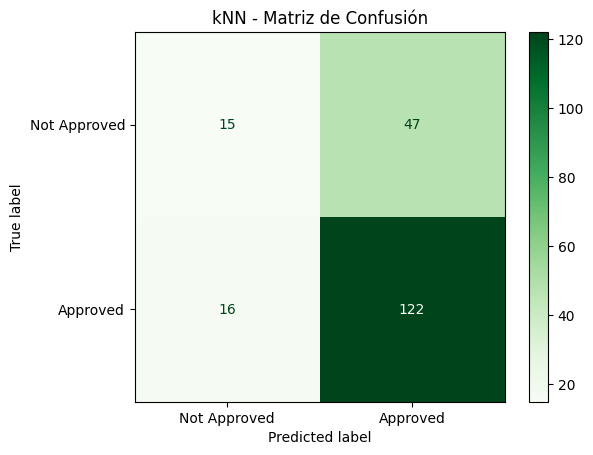

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest
cm_rf = confusion_matrix(y_test_c, predicciones_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Approved', 'Approved'])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest - Matriz de Confusión")
plt.grid(False)
plt.show()

# kNN
cm_knn = confusion_matrix(y_test_c, predicciones_cla)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Not Approved', 'Approved'])
disp_knn.plot(cmap='Greens')
plt.title("kNN - Matriz de Confusión")
plt.grid(False)
plt.show()